<img src='https://world.edu/wp-content/uploads/2019/05/COLLEGE-ACCEPTANCE.jpg' width=500>


***

## <font color='darkorange'>Explainability vs Causality</font>


Here we will look at the difference between understanding how the ML model is making predictions (explainability) and what is causing the outcome (causality)


To do so we will look at a university admission example. You have been tasked with deciding whether there is a gender bias in admission, and if there is reason for legal action against the university.


### <font color='darkorange'>Gender and university admissions</font>


In [ ]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

Load the data

In [ ]:
#load data
df_admit = pd.read_csv("/content/UCBadmit_01.csv")

#take a look
df_admit.head()

,dept,gender,admitted
0,A,male,1
1,A,male,1
2,A,male,1
3,A,male,1
4,A,male,1


In [ ]:
df_admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dept      4526 non-null   object
 1   gender    4526 non-null   object
 2   admitted  4526 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 106.2+ KB


### <font color='darkorange'>Visualize the data</font>

Let's do some exploritory data analysis before build a model.

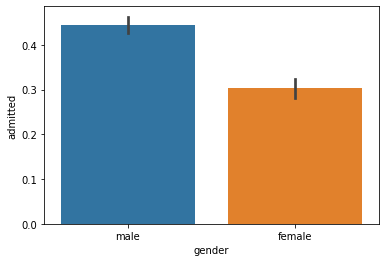

In [ ]:
#plot admissions by reported gender
sns.barplot(data=df_admit, x="gender",y="admitted")

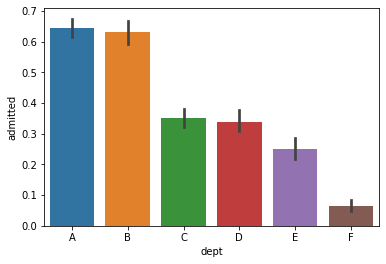

In [ ]:
#plot admissions by department
sns.barplot(data=df_admit, x="dept",y="admitted")

### <font color='darkorange'>Preprocessing</font>




We have some categorical variables so let's do some preprocessing!

Let's one-hot-encode 'dept'

In [ ]:
df_cat = pd.get_dummies(df_admit['dept'])

df_admit = pd.concat([df_admit, df_cat], axis = 1)

df_admit = df_admit.drop(['dept'], axis=1)

df_admit

,gender,admitted,A,B,C,D,E,F
0,male,1,1,0,0,0,0,0
1,male,1,1,0,0,0,0,0
2,male,1,1,0,0,0,0,0
3,male,1,1,0,0,0,0,0
4,male,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4521,female,0,0,0,0,0,0,1
4522,female,0,0,0,0,0,0,1
4523,female,0,0,0,0,0,0,1
4524,female,0,0,0,0,0,0,1


Let's encode the binary gender column as 0/1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#build the encoder
my_gen = OrdinalEncoder()

#fit and transform the gender column
df_admit['gender'] = my_gen.fit_transform(df_admit['gender'].values.reshape(-1,1))

#take a look
df_admit


,gender,admitted,A,B,C,D,E,F
0,1.0,1,1,0,0,0,0,0
1,1.0,1,1,0,0,0,0,0
2,1.0,1,1,0,0,0,0,0
3,1.0,1,1,0,0,0,0,0
4,1.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4521,0.0,0,0,0,0,0,0,1
4522,0.0,0,0,0,0,0,0,1
4523,0.0,0,0,0,0,0,0,1
4524,0.0,0,0,0,0,0,0,1


In [ ]:
#take a look at the categories
my_gen.categories_

[array(['female', 'male'], dtype=object)]

Finally, let's do a training testing split on the data.

In [ ]:
#split these data into training and testing datasets
df_train, df_test = train_test_split(df_admit, test_size=0.20, random_state=14)

### <font color='darkorange'>Build a model</font>

Can we predict admision based on reported gender?

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100">  

Build a linear regression predicting Divorce using wafflehouses.

In [ ]:
import statsmodels.api as sm #for running regression!
import statsmodels.formula.api as smf

#1. Build the model
m1 = smf.logit("admitted ~ gender", data=df_train)

#2. Use the data to fit the model (i.e., find the best intercept and slope parameters)
m1_results = m1.fit()

#Look summary
print(m1_results.summary())

Optimization terminated successfully.
         Current function value: 0.656710
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                 3620
Model:                          Logit   Df Residuals:                     3618
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Jun 2022   Pseudo R-squ.:                 0.01786
Time:                        17:02:14   Log-Likelihood:                -2377.3
converged:                       True   LL-Null:                       -2420.5
Covariance Type:            nonrobust   LLR p-value:                 1.441e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8545      0.057    -14.910      0.000      -0.967      -0.742
gender         0.6581      0.

### <font color='darkorange'>Fit the model again, this time add the department</font>

In [ ]:
#1. Build the model
m2 = smf.logit("admitted ~ gender + B + C + D + E + F", data=df_train)

#2. Use the data to fit the model (i.e., find the best intercept and slope parameters)
m2_results = m2.fit()

#Look summary
print(m2_results.summary())

Optimization terminated successfully.
         Current function value: 0.570804
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                 3620
Model:                          Logit   Df Residuals:                     3613
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Jun 2022   Pseudo R-squ.:                  0.1463
Time:                        17:06:53   Log-Likelihood:                -2066.3
converged:                       True   LL-Null:                       -2420.5
Covariance Type:            nonrobust   LLR p-value:                9.386e-150
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6714      0.111      6.038      0.000       0.453       0.889
gender        -0.0884      0.

We can see when we account for department in the model the slope for gender get's close to zero. What is going on here?

### <font color='darkorange'>Statistical confounds</font>

> Statistical confounds make it hard to determine the causal nature of the patterns we find in ML model results. We need to be careful about how we explain how a model makes predictions and the causal nature of those patterns.

> In the case of the admissions and gender, there is a process where genders are not applying to departments in equal measure.

That is the causal relationships that generated this data might look something like:

Gender --> Department --> Admission

### <font color='darkorange'>Let's see what feature importance suggests</font>

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100">  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

#split data into predictors (X) and target (y)
X = df_admit.drop(['admitted', 'A'],axis=1)
y = df_admit['admitted']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#fit linear regression
LR1 = LinearRegression()
LR1.fit(X_train, y_train)

#model interpretation
rel_impo = permutation_importance(LR1, X_test, y_test,n_repeats=30,random_state=0)
pd.DataFrame({"feature":X_test.columns,"importance":rel_impo.importances_mean, "sd":rel_impo.importances_std})

,feature,importance,sd
0,gender,0.000641,0.000256
1,B,0.000174,0.000246
2,C,0.116265,0.016185
3,D,0.115603,0.015062
4,E,0.138386,0.014744
5,F,0.376880,0.026012


### <font color='darkorange'>Let's see what feature selection suggests</font>

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

#split data into predictors (X) and target (y)
X = df_admit.drop(['admitted','A'], axis=1)
y = df_admit['admitted']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#build a linear regression (full model)
LR1 = LinearRegression()

#fit linear regression
LR1.fit(X_train, y_train)

LinearRegression()

In [ ]:
#min number of variables/features
min_features_to_select = 1

#build the feature selection algorithm
rfecv = RFECV(estimator=LR1, step=1, cv=3,scoring='neg_mean_squared_error', min_features_to_select=min_features_to_select)

#fit the algorithm to the data
rfecv.fit(X_train, y_train)

RFECV(cv=3, estimator=LinearRegression(), scoring='neg_mean_squared_error')

Optimal number of features : 4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


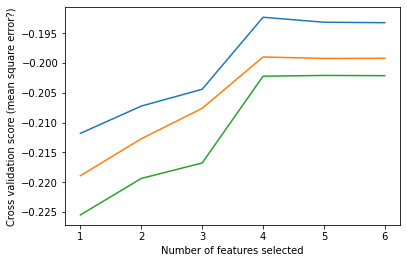

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean square error?)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.support_

array([False, False,  True,  True,  True,  True])

In [ ]:
X_train_reduced = X_train.iloc[:,rfecv.support_]

X_train_reduced.head(3)

,C,D,E,F
3405,0,0,1,0
2866,0,1,0,0
821,0,0,0,0


In [ ]:
#get the slopes!
rfecv.estimator_.coef_

array([-0.29752884, -0.29455492, -0.38458717, -0.57526361])

### <font color='darkorange'>Bonus</font>

Redo the exercise above this time using a more black box approach, e.g., Random Forest!

### <font color='darkorange'>Further reading</font>